<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline: Azar 18th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [55]:
# Set your student number
student_number = 98109837
Name = 'Amirreza'
Last_Name = 'Soleimanbeigi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Azar 18th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 28th 23:59:59.

In [63]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30+5 Points)

<font size=4>
Author: Pooya Moini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Bayesian Networks

In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28$ (784) pixels. Consider the Bayesian network in Figure 1 . The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image. The variables in the top layer, $Z_{1}$ and $Z_{2}$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

![Figure1](./Images/fig1.png)

The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_{1}, z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. 

For this programming assignment, we provide a pretrained model trained_mnist_model. The starter code loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_{1}\right)=\operatorname{Val}\left(Z_{2}\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_{j}\right)=\{0,1\}$, i.e., the image is binary.

### 1. 
How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?

How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images? (5 points)

2^784, 2^784 - 1

In [1]:
from typing import Callable
import random
def get_sample_Z(get_p_z: Callable[[float], float]) -> float:
    point = random.uniform(0, 1)
    for z in disc_z1:
        point -= get_p_z(z)
        if point < 0:
            return z
    
        
def get_sample():
    z1 = get_sample_Z(get_p_z1)
    z2 = get_sample_Z(get_p_z2)
    p_x = get_p_x_cond_z1_z2(z1, z2)
    points = np.random.uniform(0, 1, size=NUM_PIXELS)
    return z1, z2, (points < p_x).astype(int)

Run below codes to load the network and its functions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [3]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]


In [4]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [5]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open('Helper_codes/trained_mnist_model', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [6]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('Helper_codes/trained_mnist_model')

### 2.
Produce 5 samples from the joint probability distribution $\left(z_{1}, z_{2}, x_{1: 784}\right) \sim p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables). (7 points)

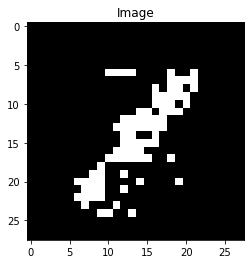

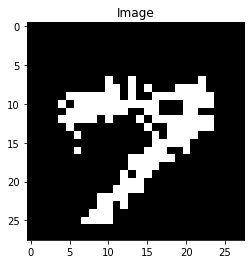

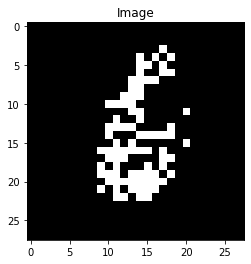

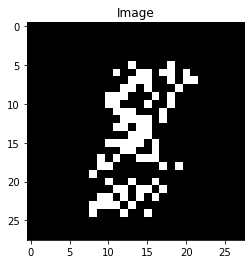

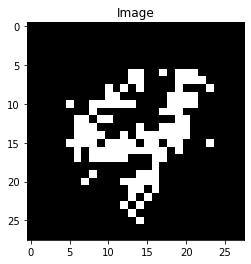

In [7]:
# write here
samples = [get_sample() for _ in range(5)]
images = np.array([sample[2].reshape((28, 28)) for sample in samples])
for image in images:
    plt.imshow(image, cmap='gray')
    plt.title('Image')
    plt.show()

### 3.

For each possible value of
$$
\left(\bar{z}_{1}, \bar{z}_{2}\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\}
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_{1}, Z_{2}=\left(\bar{z}_{1}, \bar{z}_{2}\right)\right] .$ This is the expected image corresponding to each possible value of the latent variables $Z_{1}, Z_{2} .$ Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_{1}$ and $Z_{2}$ respectively. What is the intuitive role of the $Z_{1}, Z_{2}$ variables in this model? (8 points)

z1 shows how much curvy is the image of the digit
z2 shows how much straight is the image of the digit

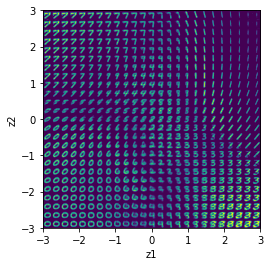

In [10]:
image = np.zeros((25*28, 25*28))
row = 25*28
for z2 in disc_z2:
    row -= 28
    column = 0
    for z1 in disc_z1:
        image[row:row+28, column:column+28] = bayes_net['cond_likelihood'][(z1, z2)].reshape(28, 28)
        column += 28
plt.imshow(image, extent =[-3, 3, -3, 3])
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

In [14]:
mat = loadmat('Helper_codes/testval.mat')
val_data = mat['val_x']
test_data = mat['test_x']

### 4.
You are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_{1}} \sum_{z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted". (15 points)

In [18]:
def get_log_p_x1_784(x1_784):
    p = 0
    for z2 in disc_z2:
        for z1 in disc_z1:
            p_z1z2 = get_p_z1(z1) * get_p_z2(z2)
            p += np.prod(get_p_x1_784(z1, z2, x1_784)) * p_z1z2
    p = 10**-100 if p == 0 else p
    return np.log10(p)

def get_p_x1_784(z1, z2, x1_784):
    p = np.ones(784) - x1_784 - bayes_net['cond_likelihood'][(z1, z2)][0]
    return np.where(p < 0, -p, p)


log_likelihood_val_data = np.zeros(len(val_data))
for i in range(len(val_data)):
    log_likelihood_val_data[i] = get_log_p_x1_784(val_data[i])

In [19]:
mean, std = log_likelihood_val_data.mean(), log_likelihood_val_data.std()
real = np.array([])
corrupted = np.array([])
for data in test_data:
    log_p_x1_784 = get_log_p_x1_784(data)
    if abs(log_p_x1_784 - mean) <= 3 * std:
        real = np.append(real, log_p_x1_784)
    else:
        corrupted = np.append(corrupted, log_p_x1_784)

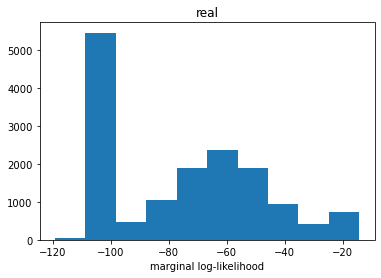

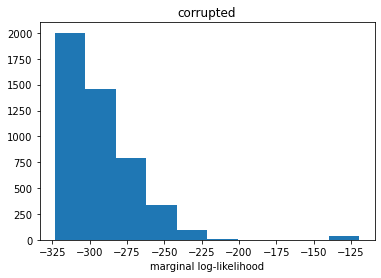

In [20]:
def plot_histogram(array, title):
    plt.hist(array)
    plt.xlabel('marginal log-likelihood')
    plt.title(title)
    plt.show()

plot_histogram(real, 'real')
plot_histogram(corrupted, 'corrupted')

---

# Q2 (40 Points)

<font size=4>
Author: Mohammad Mahdi Asmae
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [498]:
############################################################
# please set a random seed to get the same results in      #
# different runs                                           #
############################################################
import random
random.seed(5)

In [499]:
import matplotlib.pyplot as plt

graph = {}
graph['A'] = [['D', 'C'], []]
graph['B'] = [['E'], []]
graph['C'] = [['D', 'G'], ['A', 'E']]
graph['D'] = [['F', 'G'], ['A', 'C']]
graph['E'] = [['C', 'G'], ['B']]
graph['F'] = [[], ['D']]
graph['G'] = [[], ['C', 'D', 'E']]
CPT = {}
CPT['A'] = {'1': 0.8, '0': 0.2}
CPT['B'] = {'1': 0.55, '0': 0.45}
CPT['C'] = {
    '000': 0.3, '100': 0.7,
    '010': 0.5, '110': 0.5,
    '001': 0.85, '101': 0.15,
    '011': 0.95, '111': 0.05
}
CPT['D'] = {
    '000': 0.2, '100': 0.8,
    '010': 0.5, '110': 0.5,
    '001': 0.35, '101': 0.65,
    '011': 0.33, '111': 0.67
}
CPT['E'] = {
    '11': 0.3, '01': 0.7,
    '10': 0.9, '00': 0.1
}
CPT['F'] = {
    '11': 0.2, '01': 0.8,
    '10': 0.25, '00': 0.75
}
CPT['G'] = {
    '0000': 1, '1000': 0,
    '0001': 1, '1001': 0,
    '0010': 1, '1010': 0,
    '0011': 1, '1011': 0,
    '0100': 1, '1100': 0,
    '0101': 1, '1101': 0,
    '0110': 1, '1110': 0,
    '0111': 1, '1111': 0,
}

In [501]:
class BN(object):
    """
    Bayesian Network implementation with sampling methods as a class
    
    Attributes
    ----------
    n: int
        number of variables
        
    G: dict
        Network representation as a dictionary. 
        {variable:[[children],[parents]]} # You can represent the network in other ways. This is only a suggestion.
    """
    
    def __init__(self, graph, CPT) -> None:
        ############################################################
        # Initialzie Bayesian Network                              #
        ############################################################
        self.n = len(graph)
        self.G = graph
        self.set_topological_order()
        self.CPT = CPT
    
    def cpt(self, node, parents_value) -> dict:
        """
        This is a function that returns cpt of the given node
        
        Parameters
        ----------
        node:
            a variable in the bayes' net
            
        Returns
        -------
        result: dict
            {parents_value1: {node_value1:p_value1, node_value2:p_value2, ...}, parents_value2: ...}
        """
        return self.CPT[node][parents_value]
    
    def pmf(self, query, evidence) -> float:
        """
        This function gets a variable and its value as query and a list of evidences and returns probability mass function P(Q=q|E=e)
        
        Parameters
        ----------
        query:
            a variable and its value
            e.g. {'A': 1}
        evidence:
            list of variables and their values
            e.g. {'B': 0, 'C': 1}
        
        Returns
        -------
        PMF: float
            P(query|evidence)
        """
        hidden_variables = [var for var in self.G if var not in query and var not in evidence]
        factors = [[[var, *self.G[var][1]], CPT.copy()] for var, CPT in self.CPT.items()]
        self.remove_nonmatching_evidences(evidence, factors)
        for var in hidden_variables:
            self.join_and_eliminate(var, factors, evidence)
        joint_factor = self.get_join_all_factors(factors, query, evidence)
        self.normalize(joint_factor)
        row = ''.join([str(query[variable] if variable in query else evidence[variable]) for variable in joint_factor[0]])
        return joint_factor[1][row]
        
    
    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        """
        Parameters
        ----------
        query: list
            list of variables an their values
            e.g. {'A': 0, 'E': 1}
        evidence: list
            list of observed variables and their values
            e.g. {'B': 0, 'C': 1}
        sampling_method:
            "Prior", "Rejection", "Likelihood Weighting", "Gibbs"
        num_iter:
            number of the generated samples 
        num_burnin:
            (used only in gibbs sampling) number of samples that we ignore at the start for gibbs method to converge
            
        Returns
        -------
        probability: float
            approximate P(query|evidence) calculated by sampling
        """
        ############################################################
        #     Prior sampling                                       #
        #     Rejection sampling                                   #
        #     Likelihood weighting                                 #
        #     Gibbs sampling                                       #
        ############################################################
        if sampling_method == 'Prior':
            return self.prior_sample(query, evidence, num_iter)
        elif sampling_method == 'Rejection':
            return self.rejection_sample(query, evidence, num_iter)
        elif sampling_method == 'Likelihood Weighting':
            return self.likelihood_sample(query, evidence, num_iter)
        elif sampling_method == 'Gibbs':
            return self.gibbs_sample(query, evidence, num_iter, num_burnin)
        
        
    def prior_sample(self, query, evidence, num_iter):
        count_consistent_evidence = 0
        count_consistent_query = 0
        for _ in range(num_iter):
            sample = self.get_prior_sample()
            if self.sample_consistent_with_evidence(sample, evidence):
                count_consistent_evidence += 1
                if self.sample_consistent_with_query(sample, query):
                    count_consistent_query += 1
        return count_consistent_query / count_consistent_evidence
        
        
    def sample_consistent_with_evidence(self, sample, evidence):
        for var, value in evidence.items():
            if value != sample[var]:
                return False
        return True
    
    
    def sample_consistent_with_query(self, sample, query):
        for var, value in query.items():
            if value != sample[var]:
                return False
        return True
        
        
    def get_prior_sample(self):
        sample = {}
        for var in self.topological_order:
            row = '0' + ''.join([str(sample[parent]) for parent in self.G[var][1]])
            sample[var] = 0 if random.uniform(0, 1) < self.CPT[var][row] else 1
        return sample
    
    
    def rejection_sample(self, query, evidence, num_iter):
        count_consistent_query = 0
        for _ in range(num_iter):
            sample = self.get_rejection_sample(evidence)
            if self.sample_consistent_with_query(sample, query):
                count_consistent_query += 1
        return count_consistent_query / num_iter
    
    
    def get_rejection_sample(self, evidence):
        sample = self.get_prior_sample()
        while not self.sample_consistent_with_evidence(sample, evidence):
            sample = self.get_prior_sample()
        return sample
    
    
    def likelihood_sample(self, query, evidence, num_iter):
        all_weight = 0
        consistent_query_weight = 0
        for _ in range(num_iter):
            sample, weight = self.get_likelihood_sample(evidence)
            all_weight += weight
            if self.sample_consistent_with_query(sample, query):
                consistent_query_weight += weight
        return consistent_query_weight / all_weight
    
    
    def get_likelihood_sample(self, evidence):
        sample = evidence.copy()
        weight = 1
        for var in self.topological_order:
            parents_values = ''.join([str(sample[parent]) for parent in self.G[var][1]])
            if var in evidence:
                row = str(evidence[var]) + parents_values
                weight *= self.CPT[var][row]
            else:
                row = '0' + parents_values
                sample[var] = 0 if random.uniform(0, 1) < self.CPT[var][row] else 1
        return sample, weight
            
        
    def gibbs_sample(self, query, evidence, num_iter, num_burnin):
        count_consistent_query = 0
        nonevidence_vars = [var for var in self.G if var not in evidence]
        for i in range(num_iter+int(num_burnin)):
            chosen_var = nonevidence_vars[i % len(nonevidence_vars)]
            if i == 0:
                sample = self.get_randomly_sample(evidence)
            else:
                self.set_gibbs_sample(chosen_var, sample) 
            if i >= num_burnin and self.sample_consistent_with_query(sample, query):
                count_consistent_query += 1
        return count_consistent_query / num_iter
    
    
    def get_randomly_sample(self, evidence):
        return {**{var: random.choice([0, 1]) for var in self.G if var not in evidence}, **evidence}
            
                
    def set_gibbs_sample(self, chosen_var, sample):
        del sample[chosen_var]
        sample[chosen_var] = 0 if random.uniform(0, 1) < self.pmf({chosen_var: 0}, sample) else 1
        
    
    def set_topological_order(self):
        self.topological_order = []
        visited = {node: False for node in self.G}
        for node, neighbors in self.G.items():
            if len(neighbors[1]) == 0:
                self.topological_sort(node, visited)
    
    
    def topological_sort(self, node, visited):
        visited[node] = True
        self.topological_order.append(node)
        for child in self.G[node][0]:
            if not visited[child] and self.all_parents_visited(child, visited):
                self.topological_sort(child, visited)
             
            
    def all_parents_visited(self, node, visited) -> bool:
        for parent in self.G[node][1]:
            if not visited[parent]:
                return False
        return True
           
        
    def remove_nonmatching_evidences(self, evidence, factors):
        for var, value in evidence.items():
            for factor in factors:
                if var in factor[0]:
                    index_var = factor[0].index(var)
                    rows_to_remove = [values for values in factor[1] if values[index_var] != str(value)]
                    for row in rows_to_remove:
                        del factor[1][row]
               
            
    def join_and_eliminate(self, var, factors, evidence):
        var_factors = self.get_var_factors(var, factors)
        joined_factor = self.get_joined_factor(var_factors, var, evidence)
        factors.append(joined_factor)
        
        
    def get_joined_factor(self, var_factors, var, evidence):
        variables_in_joined_factor = self.get_variables_in_joined_factor(var_factors, var, evidence)
        evidence_values = ''.join([str(evidence[variable]) for variable in variables_in_joined_factor[1]])
        prob_table_joined_factor = {}
        for i in range(2**len(variables_in_joined_factor[0])):
            if len(variables_in_joined_factor[0]) != 0:
                binary_values = '{:b}'.format(i)
                values = '0' * (len(variables_in_joined_factor[0]) - len(binary_values)) + binary_values
            else:
                values = ''
            probability0 = 1
            probability1 = 1
            for factor in var_factors:
                row0, row1 = self.get_rows_factor(factor, var, evidence, values, variables_in_joined_factor)
                probability0 *= factor[1][row0] 
                probability1 *= factor[1][row1]
            probability = probability0 + probability1
            row = values + evidence_values
            prob_table_joined_factor[row] = probability
        return [[*variables_in_joined_factor[0], *variables_in_joined_factor[1]], prob_table_joined_factor]
    
    
    def get_rows_factor(self, factor, var, evidence, values, variables_in_joined_factor):
        row0 = ''
        row1 = ''
        for variable in factor[0]:
            if variable == var:
                row0 += '0'
                row1 += '1'
            elif variable in evidence:
                row0 += str(evidence[variable])
                row1 += str(evidence[variable])
            else:
                row0 += values[variables_in_joined_factor[0].index(variable)]
                row1 += values[variables_in_joined_factor[0].index(variable)]
        return row0, row1
    
        
    def get_var_factors(self, var, factors):
        var_factors = []
        for factor in factors.copy():
            if var in factor[0]:
                var_factors.append(factor)
                factors.remove(factor)
        return var_factors
             
        
    def get_variables_in_joined_factor(self, var_factors, var, evidence):
        factors_variables = []
        for factor in var_factors:
            factors_variables += factor[0]
        factors_variables = list(set(factors_variables)-{var})
        evidence_variables_in_joined_factor = []
        nonevidence_variables_in_joined_factor = []
        for variable in factors_variables:
            if variable in evidence:
                evidence_variables_in_joined_factor.append(variable)
            else:
                nonevidence_variables_in_joined_factor.append(variable)
        return [nonevidence_variables_in_joined_factor, evidence_variables_in_joined_factor]
    
    
    def get_join_all_factors(self, factors, query, evidence):
        prob_table_joined_factor = {}
        query_vars = list(query.keys())
        evidence_vars = list(evidence.keys())
        evidence_values = ''.join([str(evidence[variable]) for variable in evidence_vars])
        for i in range(2**len(query)):
            binary_values = '{:b}'.format(i)
            values = '0' * (len(query) - len(binary_values)) + binary_values
            probability = 1
            for factor in factors:
                factor_row = self.get_row_factor(factor, query_vars, evidence, values)
                probability *= factor[1][factor_row] 
            row = values + evidence_values
            prob_table_joined_factor[row] = probability
        return [[*query_vars, *evidence_vars], prob_table_joined_factor]
    
    
    def get_row_factor(self, factor, query_vars, evidence, values):
        row = ''
        for variable in factor[0]:
            if variable in evidence:
                row += str(evidence[variable])
            else:
                row += values[query_vars.index(variable)]
        return row
    
    
    def normalize(self, joint_factor):
        sum = 0
        for probability in list(joint_factor[1].values()):
            sum += probability
        if sum == 0:
            return
        for row in joint_factor[1]:
            joint_factor[1][row] /= sum
            

In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0,B=1|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

In [505]:
############################################################
# x-axis: number of samples                                #
# y-axis: error                                            #
# Your plot have to contain errors for all diffrent        #
# methods of sampling that you've implemented              #
############################################################
random.seed(5)
bayes_net = BN(graph, CPT)
num_samples = [100, 500, 1000, 3000, 10000, 50000]
sampling_methods = ['Prior', 'Rejection', 'Likelihood Weighting', 'Gibbs']
def plot(title, x, y, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.scatter(x, y)
    for i, j in zip(x, y):
        plt.text(i, j, '({}, {})'.format(i, j))
    plt.show()

    
def comparing_results(query, evidence):
    prob = bayes_net.pmf(query, evidence)
    for method in sampling_methods: 
        error_sampling = [round(bayes_net.sampling(query, evidence, method, num)-prob, 5) for num in num_samples]
        plot(method, num_samples, error_sampling, 'number of samples', 'errors')

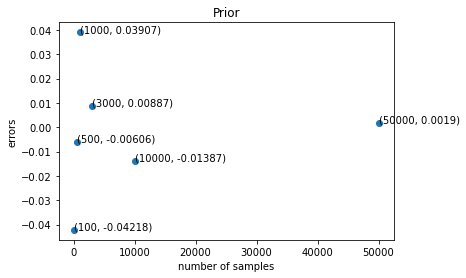

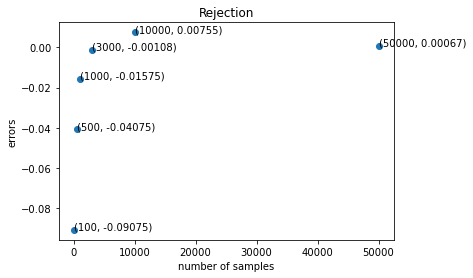

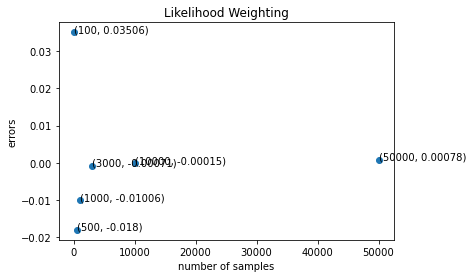

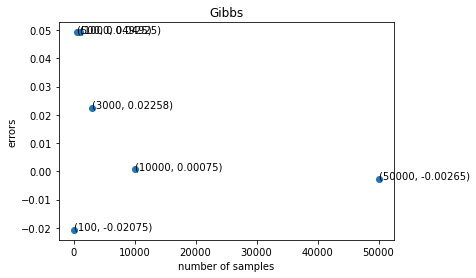

In [506]:
random.seed(5)
query = {'F': 1}
evidence = {'A': 1, 'E': 0}
comparing_results(query, evidence)

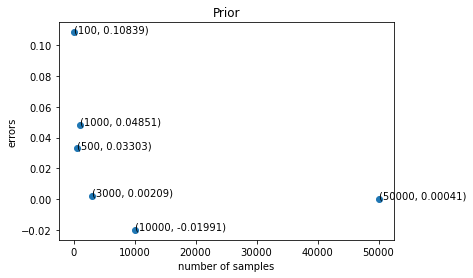

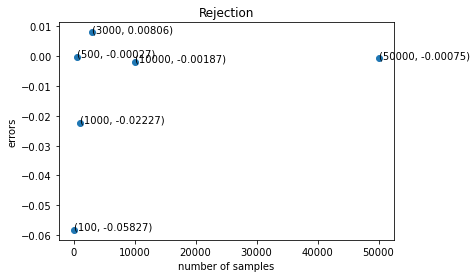

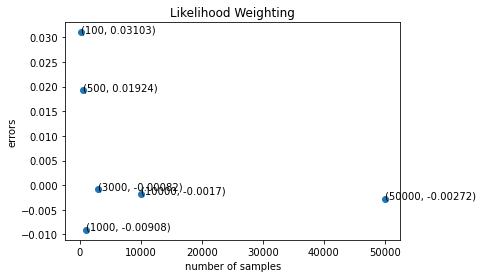

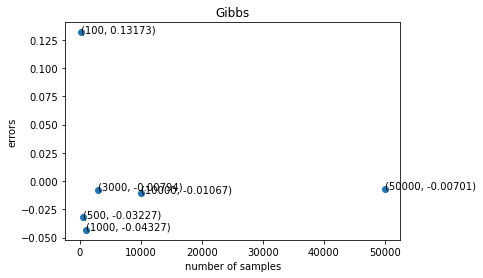

In [507]:
random.seed(5)
query = {'C': 0, 'B': 1}
evidence = {'F': 1, 'D': 0}
comparing_results(query, evidence)

For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

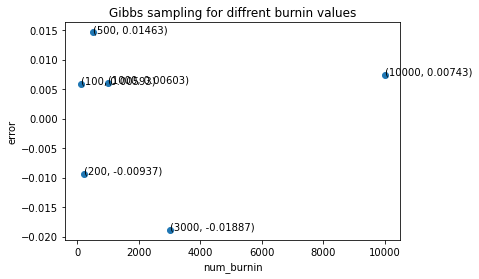

In [508]:
random.seed(5)
query = {'C': 0, 'B': 1}
evidence = {'F': 1, 'D': 0}
prob = bayes_net.pmf(query, evidence)
burnin_values = [100, 200, 500, 1000, 3000, 10000]
error_sampling = [round(bayes_net.sampling(query, evidence, 'Gibbs', 10000, num_burnin)-prob, 5) for num_burnin in burnin_values]
plot('Gibbs sampling for diffrent burnin values', burnin_values, error_sampling, 'num_burnin','error')


# Q3 (20+ 5 Points)

<font size=4>
Author: Kian Bakhtari
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## The Puerto Princesa ship

At midnight on a fall day in the Philippines, a ship leaves Puerto Princesa City's seaport to Macao, China. After one or two hours, the boat loses its GPS connection because of a technical issue. Captain keeps navigating the ship to its destination, using the stars and four old radio towers, which you can see on the map. Each antenna could measure the ship's coordinates (X, Y) and send them to its receiver. There are five records of towers signals at five different times, available for you in the records.json file. Also, the boat's actual coordinates are available in the real_coordinates.json file. The exact coordinates are ONLY FOR EVALUATION PURPOSES, and you CAN NOT use them as input data. The five dots on the map below are actual coordinates of the ship, at each time step where the records from antennas were received. Also, the map is decorative and is not part of the data.

![Figure3-1](./Images/map.png)

Each tower has a noise that is coming from a gaussian distribution, meaning that every (X, Y) pair that is received from an antenna is actually derived from:

X = sample_from_normal_distribution(mean = X_real, std = antenna's std)
Y = sample_from_normal_distribution(mean = Y_real, std = antenna's std)

Information of radio towers (coordinate and noise standard deviation) is available in the towers_info.json file.

The ship's movement between those five different time steps could be mathematically modeled as follows:
At each time step, the ship moves D units to the north and F units to either east or west (half of the times west, and half of the times east). D and F are both samples from exponential distributions with a scale of Y_STEP and X_STEP, respectively. Those parameters are available in the moving_model.json file.

### Hidden Markov Model

At this point, you can build a simple HMM and estimate the ship's coordinates using the conditional probabilities that you have. For each time step, calculate the ship's coordinates at that time step and previous time steps, using the tower records received up to that time. In simpler words, calculate:<br>

P(coor_0 | records_0)<br>
P(coor_1 | records_0, records_1)<br>
...<br>
P(coor_4 | records_0, records_1, records_2, records_3, records_4)<br>


The actual coordinates of the ship in the first time step (coor_0) is coming from a 2-dimensional guassian distribution with the mean of Puerto Princesa city's coordinates and covarianve matrix of INIT_COV (scalar) times the identity matrix. INIT_COV and coordinates of Puerto Princesa city is availabel in moving_model.json file.

## Libraries

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from scipy.stats import norm, expon
import scipy
import pandas as pd

## Data

In [23]:
real_coordinates = json.load(open('./inputs/real_coordinates.json'))
pd.DataFrame(real_coordinates)

,X,Y
0,1087.233417,-57.165368
1,1044.936241,72.343990
2,967.051182,392.826826
3,314.440277,1219.678719
4,590.424895,1413.279887


In [24]:
towers_info = json.load(open('./inputs/towers_info.json'))
pd.DataFrame(towers_info)

,1,2,3,4
x,1405,10,210,630
y,600,880,1890,2090
std,60,110,90,80


In [25]:
moving_model = json.load(open('./inputs/moving_model.json'))
moving_model

{'X_STEP': 300,
 'Y_STEP': 600,
 'INIT_COV': 200,
 'Peurto_coordinates': [1105, -50]}

In [26]:
records = json.load(open('./inputs/records.json'))
pd.DataFrame(records)

,Tower1,Tower2,Tower3,Tower4
0,"[994, -36]","[873, -28]","[958, 70]","[1077, -128]"
1,"[1053, 63]","[926, 26]","[961, 110]","[905, 82]"
2,"[956, 389]","[1106, 499]","[1005, 397]","[901, 326]"
3,"[331, 1227]","[377, 1232]","[270, 1282]","[232, 1051]"
4,"[520, 1376]","[577, 1446]","[397, 1456]","[648, 1364]"


## Functions

In [27]:
tower_records = [(records.get('Tower1')[i],
                  records.get('Tower2')[i], 
                  records.get('Tower3')[i], 
                  records.get('Tower4')[i]) for i in range(5)]

In [28]:
tower_records

[([994, -36], [873, -28], [958, 70], [1077, -128]),
 ([1053, 63], [926, 26], [961, 110], [905, 82]),
 ([956, 389], [1106, 499], [1005, 397], [901, 326]),
 ([331, 1227], [377, 1232], [270, 1282], [232, 1051]),
 ([520, 1376], [577, 1446], [397, 1456], [648, 1364])]

In [31]:
def get_mean_towers_coor(time_step: int, tower_records: list):
    # The average of all four towers measurements at a given time step
    x = np.average([tower_coor[0] for tower_coor in tower_records[time_step]])
    y = np.average([tower_coor[1] for tower_coor in tower_records[time_step]])
    return x, y


def P_coor0(coor0):
    # Distribuiton of initial coordinates (time step 0)
    x0, y0 = coor0
    return scipy.stats.multivariate_normal.pdf([x0, y0], 
                            mean=moving_model.get('Peurto_coordinates'), cov=moving_model.get('INIT_COV'))


# filling these three functions with apropriate codes:

def P_coor_given_prevCoor(coor, prev_coor):
    # Probability of coordinates at time step i, given the coordinates of time step i-1
    x_movement = abs(coor[0] - prev_coor[0])
    y_movement = coor[1] - prev_coor[1]
    pdf_y_movement = 0 if y_movement < 0 else expon.pdf(y_movement, scale=moving_model['Y_STEP'])
    pdf_x_movement = 1/2 * expon.pdf(x_movement, scale=moving_model['X_STEP'])
    return pdf_x_movement, pdf_y_movement

    
def P_towerCoor_given_coor(tower_coor, tower_std, coor):
    # Probability of a tower measurement, given the coordinates of the ship
    return norm.pdf(tower_coor[0], loc=coor[0], scale=tower_std), norm.pdf(tower_coor[1], loc=coor[1], scale=tower_std)
    
    
def P_record_given_coor(rec, coor, towers_info):
    # All four measurements of all four towers at time step i, is called the record of thime step i.
    # This function returns the probability of a record given the ship's coordinates.
    probability = np.array([1., 1.])
    for tower_num, tower_coor in enumerate(rec):
        probability *= np.array(P_towerCoor_given_coor(tower_coor, towers_info[str(tower_num+1)]['std'], coor))
    return probability


In [32]:
# extra space
def gradient_descent(func, x0, y0, iter_num):
    x, y = x0, y0
    for _ in range(iter_num):
        if gradient(func, x, y) == (0, 0):
            break
        if abs(gradient(func, x, y)[0]) > abs(gradient(func, x, y)[1]):
            x = x - 1 if gradient(func, x, y)[0] > 0 else x + 1
            if abs(gradient(func, x, y)[0]) < 10**3 * abs(gradient(func, x, y)[1]):
                y = y - 1 if gradient(func, x, y)[1] > 0 else y + 1
        else:
            if abs(gradient(func, x, y)[1]) < 10**3 * abs(gradient(func, x, y)[0]):
                x = x - 1 if gradient(func, x, y)[0] > 0 else x + 1
            y = y - 1 if gradient(func, x, y)[1] > 0 else y + 1
    return x, y

def gradient(func, x, y):
    return (func(x + 1, y) - func(x, y)) / 1, (func(x, y + 1) - func(x, y)) / 1

In [33]:
x0, y0 = get_mean_towers_coor(0, tower_records)
iter_num = 1000
rec0 = tower_records[0]
Px = lambda x, y: -P_record_given_coor(rec0, [x, y], towers_info)[0] * P_coor0([x, y])
Py = lambda x, y: -P_record_given_coor(rec0, [x, y], towers_info)[1] * P_coor0([x, y])
gradient_descent(Px, x0, y0, iter_num)[0], gradient_descent(Py, x0, y0, iter_num)[1]

(1091.5, -48.5)

In [34]:
def real_coor(time_step):
    return round(real_coordinates.get('X')[time_step]), round(real_coordinates.get('Y')[time_step])

def dist(coor_a, coor_b):
    return round(np.sqrt((coor_a[0] - coor_b[0])**2 + (coor_a[1] - coor_b[1])**2))

coor0_estimations = []
coor1_estimations = []
coor2_estimations = []
coor3_estimations = []

#### Estimating coordinates_0 from P(coor_0) and record_0

In the cell below, you can see the approach for finding the argmax of P(coor_0 | record_0), which is equal to argmax of P(record_0 | coor_0) times P(coor_0).
We are not using derivatives to find the argmax, we are actually doing it numerically by trying different coordinates and seeing which one provides the highest probability. <br>

#### Recommended approach: You can use gradient descent to find the argmax of probability function, and that will give you 5 extra points.

In [35]:
# argmax P(coor_0 | record_0) = argmax P(record_0 | coor_0) P(coor_0)

best_x0, best_y0 = None, None

max_Px, max_Py = 0, 0
interval, step = 120, 3
# Larger interval and smaller step will lead to a more accurate result, but will increase computational 
# complexity deramaticly. Feel free to use other approaches like running this cell more than once and tighten
# the searching interval with smaller steps. 
# Recommended approach: You can use gradient descent to find the argmax of probability
# function, and that will give you 5 extra points.

towers_mean_x0, towers_mean_y0 = get_mean_towers_coor(0, tower_records)

for x0 in range(int(towers_mean_x0 - interval), int(towers_mean_x0 + interval), step):
    for y0 in range(int(towers_mean_y0 - interval), int(towers_mean_y0 + interval), step):
        
        coor0 = (x0, y0)
        rec0 = tower_records[0]
        
        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
    
        Px = P_rec0_given_x0 * p_c0
        Py = P_rec0_given_y0 * p_c0

        if Px > max_Px:
            best_x0 = x0
            max_Px = Px

        if Py > max_Py:
            best_y0 = y0
            max_Py = Py


coor0_estimations.append((best_x0, best_y0))

In [36]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')

real_coor0: (1087, -57) - Estimated_coor0: (1092, -48)
Estimation_error: 10.0


#### Estimating coordinates_0 and coordinates_1 from P(coor_0), record_0, and record_1<br>(4 points)

In [39]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)


max_Px, max_Py = 0, 0
interval, step = 30, 3

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None

towers_mean_x1, towers_mean_y1 = get_mean_towers_coor(1, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
        for x1 in range(int(towers_mean_x1 - interval), int(towers_mean_x1 + interval), step):
            for y1 in range(int(towers_mean_y1 - interval), int(towers_mean_y1 + interval), step):
                # Similiar to the cell above, calculate the best estimation
                # of coordinates_0 and coordinates_1
                coor0 = (x0, y0)
                coor1 = (x1, y1)

                rec0 = tower_records[0]
                rec1 = tower_records[1]
                
                P = np.array(P_coor0(coor0), P_coor0(coor0)) * P_record_given_coor(rec0, coor0, towers_info)
                P *= np.array(P_coor_given_prevCoor(coor1, coor0)) * P_record_given_coor(rec1, coor1, towers_info)
                
                Px, Py = P
                if Px > max_Px:
                    best_x0 = x0
                    best_x1 = x1
                    max_Px = Px

                if Py > max_Py:
                    best_y0 = y0
                    best_y1 = y1
                    max_Py = Py
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))

In [42]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')

real_coor0: (1087, -57) - Estimated_coor0: (1092, -48)
Estimation_error: 10.0

real_coor1: (1045, 72) - Estimated_coor1: (988, 70)
Estimation_error: 57.0


#### Estimating coordinates_0, coordinates_1 and coordinates_2 from P(coor_0), record_0, record_1, and record_2 <br> (4 points)

In [43]:
max_Px, max_Py = 0, 0
interval, step = 21, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None
best_x2, best_y2 = None, None

towers_mean_x2, towers_mean_y2 = get_mean_towers_coor(2, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
        for x1 in range(int(coor1_estimations[-1][0] - interval), int(coor1_estimations[-1][0] + interval), step):
            for y1 in range(int(coor1_estimations[-1][1] - interval), int(coor1_estimations[-1][1] + interval), step):
                
                 for x2 in range(int(towers_mean_x2 - interval), int(towers_mean_x2 + interval), step):
                    for y2 in range(int(towers_mean_y2 - interval), int(towers_mean_y2 + interval), step):
                        
                        coor0 = (x0, y0)
                        coor1 = (x1, y1)
                        coor2 = (x2, y2)

                        rec0 = tower_records[0]
                        rec1 = tower_records[1]
                        rec2 = tower_records[2]
                
                        P = np.array(P_coor0(coor0), P_coor0(coor0)) * P_record_given_coor(rec0, coor0, towers_info)
                        P *= np.array(P_coor_given_prevCoor(coor1, coor0)) * P_record_given_coor(rec1, coor1, towers_info)
                        P *= np.array(P_coor_given_prevCoor(coor2, coor1)) * P_record_given_coor(rec2, coor2, towers_info)
                
                        Px, Py = P
                        if Px > max_Px:
                            best_x0 = x0
                            best_x1 = x1
                            best_x2 = x2
                            max_Px = Px

                        if Py > max_Py:
                            best_y0 = y0
                            best_y1 = y1
                            best_y2 = y2
                            max_Py = Py
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))
coor2_estimations.append((best_x2, best_y2))

In [44]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')
print()
print(f'real_coor2: {real_coor(2)} - Estimated_coor2: {best_x2, best_y2}')
print(f'Estimation_error: {dist((best_x2, best_y2), real_coor(2))}')

real_coor0: (1087, -57) - Estimated_coor0: (1091, -49)
Estimation_error: 9.0

real_coor1: (1045, 72) - Estimated_coor1: (982, 74)
Estimation_error: 63.0

real_coor2: (967, 393) - Estimated_coor2: (976, 386)
Estimation_error: 11.0


#### Estimating coordinates_0, coordinates_1, coordinates_2, and coordinates_3 from  P(coor_0), record_0, record_1, record_2, and record_3 <br> (4 points)

In [47]:
max_Px, max_Py = 0, 0
interval, step = 10, 4

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None
best_x2, best_y2 = None, None
best_x3, best_y3 = None, None

towers_mean_x3, towers_mean_y3 = get_mean_towers_coor(3, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
        for x1 in range(int(coor1_estimations[-1][0] - interval), int(coor1_estimations[-1][0] + interval), step):
            for y1 in range(int(coor1_estimations[-1][1] - interval), int(coor1_estimations[-1][1] + interval), step):
                
                 for x2 in range(int(coor2_estimations[-1][0] - interval), int(coor2_estimations[-1][0] + interval), step):
                    for y2 in range(int(coor2_estimations[-1][1] - interval), int(coor2_estimations[-1][1] + interval), step):
                        
                        for x3 in range(int(towers_mean_x3 - interval), int(towers_mean_x3 + interval), step):
                            for y3 in range(int(towers_mean_y3 - interval), int(towers_mean_y3 + interval), step):
                        
                        
                                coor0 = (x0, y0)
                                coor1 = (x1, y1)
                                coor2 = (x2, y2)
                                coor3 = (x3, y3)

                                rec0 = tower_records[0]
                                rec1 = tower_records[1]
                                rec2 = tower_records[2]
                                rec3 = tower_records[3]
                
                                P = np.array(P_coor0(coor0), P_coor0(coor0)) * P_record_given_coor(rec0, coor0, towers_info)
                                P *= np.array(P_coor_given_prevCoor(coor1, coor0)) * P_record_given_coor(rec1, coor1, towers_info)
                                P *= np.array(P_coor_given_prevCoor(coor2, coor1)) * P_record_given_coor(rec2, coor2, towers_info)
                                P *= np.array(P_coor_given_prevCoor(coor3, coor2)) * P_record_given_coor(rec3, coor3, towers_info)
                                
                                Px, Py = P
                                if Px > max_Px:
                                    best_x0 = x0
                                    best_x1 = x1
                                    best_x2 = x2
                                    best_x3 = x3
                                    max_Px = Px

                                if Py > max_Py:
                                    best_y0 = y0
                                    best_y1 = y1
                                    best_y2 = y2
                                    best_y3 = y3
                                    max_Py = Py
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))
coor2_estimations.append((best_x2, best_y2))
coor3_estimations.append((best_x3, best_y3))

                    

In [48]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')
print()
print(f'real_coor2: {real_coor(2)} - Estimated_coor2: {best_x2, best_y2}')
print(f'Estimation_error: {dist((best_x2, best_y2), real_coor(2))}')
print()
print(f'real_coor3: {real_coor(3)} - Estimated_coor3: {best_x3, best_y3}')
print(f'Estimation_error: {dist((best_x3, best_y3), real_coor(3))}')

real_coor0: (1087, -57) - Estimated_coor0: (1093, -47)
Estimation_error: 12.0

real_coor1: (1045, 72) - Estimated_coor1: (984, 72)
Estimation_error: 61.0

real_coor2: (967, 393) - Estimated_coor2: (970, 388)
Estimation_error: 6.0

real_coor3: (314, 1220) - Estimated_coor3: (308, 1192)
Estimation_error: 29.0


As you know from the theoretical aspect, and you can see from your results, the errors of estimations decrease when you use more records and conditional probabilities.

#### Plot curves that show using more records, leads to decrease of estimation error.<br>( 6 points)


In [50]:
coor0_error = [dist((x0, y0), real_coor(0)) for x0, y0 in coor0_estimations]
coor1_error = [dist((x1, y1), real_coor(1)) for x1, y1 in coor1_estimations]
coor2_error = [dist((x2, y2), real_coor(2)) for x2, y2 in coor2_estimations]
coor3_error = [dist((x3, y3), real_coor(3)) for x3, y3 in coor3_estimations]

def plot(title, y):
    x = [i for i in range(len(y))]
    plt.xlabel = 'record number'
    plt.ylabel = 'error'
    plt.title(title)
    plt.plot(x, y)
    plt.show()

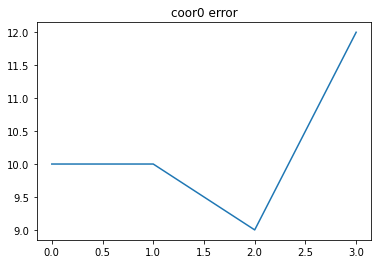

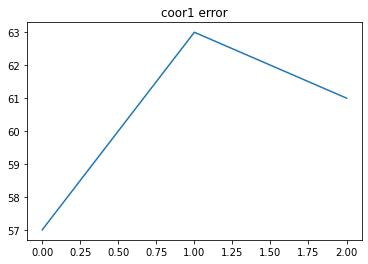

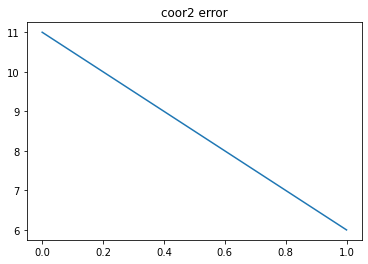

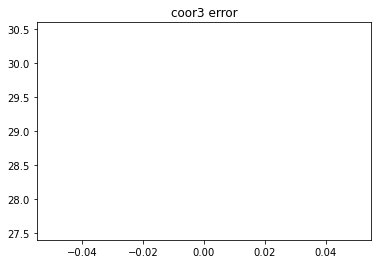

In [51]:
plot('coor0 error', coor0_error)
plot('coor1 error', coor1_error)
plot('coor2 error', coor2_error)
plot('coor3 error', coor3_error)